In [2]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
os.chdir(r'D:\10academy\financial-news-analysis')
import sys
sys.path.append(os.getcwd()) # Add the current working directory to Python's path
from scripts.data_loader import load_stock_data, load_news_data
from scripts.sentiment_analysis import analyze_sentiment, aggregate_daily_sentiment
from scripts.indicator_calculation import calculate_correlations
from scripts.data_visualization import visualize_correlations
# Suppress warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the working directory
os.chdir(r'D:\10academy\financial-news-analysis')


In [4]:
# Load stock data
stock_data_files = [
    'AAPL_historical_data.csv',
    'AMZN_historical_data.csv',
    'GOOG_historical_data.csv',
    'META_historical_data.csv',
    'MSFT_historical_data.csv',
    'NVDA_historical_data.csv',
    'TSLA_historical_data.csv'
]

In [5]:
stock_data_dir = 'notebooks/data/'
stock_data = load_stock_data(stock_data_dir, stock_data_files)

Loaded stock data for AAPL: (10998, 8)
Loaded stock data for AMZN: (6846, 8)
Loaded stock data for GOOG: (5020, 8)
Loaded stock data for META: (2926, 8)
Loaded stock data for MSFT: (9672, 8)
Loaded stock data for NVDA: (6421, 8)
Loaded stock data for TSLA: (3545, 8)

Stock data loading complete.


In [6]:
# Load news data
news_file = 'raw_analyst_ratings.csv'
news_data_dir = 'notebooks/data/'
news_file_path = os.path.join(news_data_dir, news_file)
news_df = load_news_data(news_file_path)



Loaded news data: (1407328, 6)



Sentiment analysis complete. Sample with sentiment scores:
                       date  \
0 2020-06-05 14:30:54+00:00   
1 2020-06-03 14:45:20+00:00   
2 2020-05-26 08:30:07+00:00   
3 2020-05-22 16:45:06+00:00   
4 2020-05-22 15:38:59+00:00   

                                            headline  sentiment_score  
0            Stocks That Hit 52-Week Highs On Friday            0.000  
1         Stocks That Hit 52-Week Highs On Wednesday            0.000  
2                      71 Biggest Movers From Friday            0.000  
3       46 Stocks Moving In Friday's Mid-Day Session            0.000  
4  B of A Securities Maintains Neutral on Agilent...            0.296  

Aggregated daily sentiment:
            avg_sentiment
Date                     
2009-02-14        0.22630
2009-04-27        0.00000
2009-04-29        0.00000
2009-05-22        0.00000
2009-05-27        0.75105

Correlation between news sentiment and AAPL daily return: 0.1461

Correlation between news sentiment and AMZN

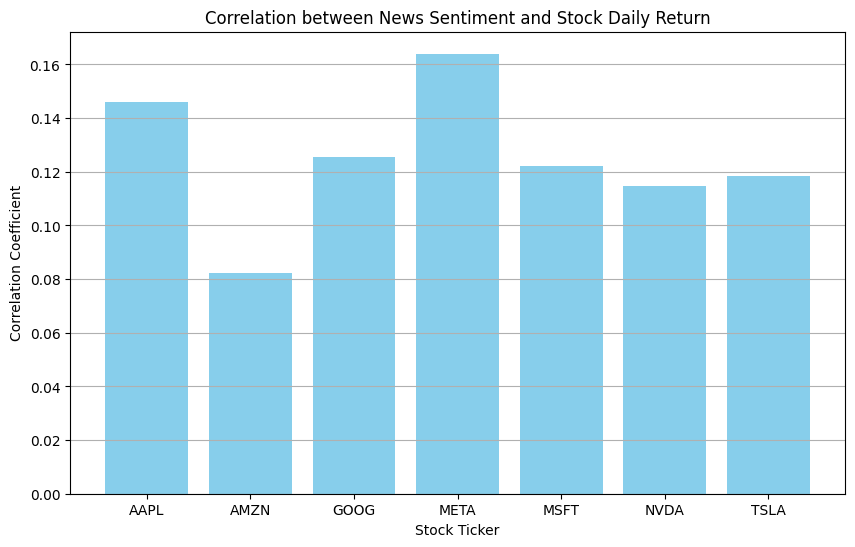


Correlation visualization complete.

Analysis complete.


In [7]:
if news_df is not None:
    news_df = analyze_sentiment(news_df)  # Call the new sentiment analysis function
    daily_sentiment = aggregate_daily_sentiment(news_df)  # Call the aggregation function

    # Calculate correlations
    correlation_results = calculate_correlations(stock_data, daily_sentiment)

    # Convert to DataFrame for visualization
    correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Stock', 'Correlation'])
    visualize_correlations(correlation_df)  # Visualize the correlations

print("\nAnalysis complete.")